In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import pickle
import re
from bs4 import BeautifulSoup
from sys import stdout

# Relatives analysis

**In this notebook, we are only interested in the links created between characters that are relatives. We will build an adjacency matrix based on that.**

# Part 1: Marvel dataset

In [ ]:
with open('data/clean_marvel.txt', 'rb') as f:
    relat_marvel = pickle.load(f)

relat_marvel.drop(columns=['Affiliation'], inplace=True)

relat_marvel

**We split the list in the column `Relatives`, each URL that is in it will be in a different row, with the corresponding character.**

In [ ]:
s = relat_marvel.apply(lambda x: pd.Series(x['Relatives']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'Relatives'

relat_marvel = relat_marvel.drop('Relatives', axis=1).join(s)
relat_marvel['Relatives'] = pd.Series(relat_marvel['Relatives'], dtype=object)
relat_marvel

**We create a list of unique urls, and use it as rows and columns of the adjacency matrix.**

In [ ]:
urls = relat_marvel['URL'].unique()
adj_relat_marvel = pd.DataFrame(0, index=urls, columns=urls, dtype = 'b')

**Some URLs aren't stored the same way in the `Relatives` as in the `URL`. For example, we could have */wiki/Buri_(Asgardian)_(Earth-616)* in `Relatives` and */wiki/Buri_(Earth-616)* in `URL`, even if they link to the same page. We thus use a request and get the URL again to match the two columns.**

In [ ]:
i = 0
tot_page = urls.unique().size

for url in urls:
    # Loading bar
    i += 1
    printed= i/tot_page*100
    stdout.write("\r%f %%" % printed)
    stdout.flush()
    
    for rel in relat_marvel[relat_marvel['URL'] == url]['Relatives']:
        # Deal with different URLs
        if rel not in urls:
            r = requests.get('https://marvel.fandom.com' + rel)
            if r:
                rel = r.url.replace('https://marvel.fandom.com','')
            
        #All URLs in the adjacency start with "/wiki"
        if (rel is not '') and ('/wiki/' in rel):
            if rel[0] is not '/':
                rel = rel[1:]
            if rel in urls:
                adj_relat_marvel[url][rel] = 1
                
                # Adjacency should be symmetric. Even if some data is missing for a character,
                # we make sure that we fill in the matrix correctly.
                adj_relat_marvel[rel][url] = 1

In [ ]:
pickle.dump(adj_relat_marvel, open("data/adj_relat_marvel.txt", 'wb'), protocol=4)

In [ ]:
plt.spy(adj_relat_marvel,markersize=0.1)

In [ ]:
dum = adj_relat_marvel

In [ ]:
adj_relat_marvel['/wiki/Ace_Maxwell_(Earth-616)']

In [ ]:
dum

# Part 2: DC dataset

In [2]:
with open('data/clean_dc.txt', 'rb') as f:
    relat_dc = pickle.load(f)

relat_dc.drop(columns=['Affiliation'], inplace=True)

relat_dc

,URL,Real Name,Current Alias,Relatives,Subcomic URL,First apparition,Last apparition
0,/wiki/Aaron_Hayley_(New_Earth),Aaron Hayley,Swamp Thing,[],[/wiki/Swamp_Thing:_Rootshe 1st Stor],1998.0,1998.0
1,/wiki/Adam_Strange_(JSA:_The_Golden_Age),Adam Strange,Adam Strange,[],[/wiki/Golden_Age_Vol_1_4Book 4],1994.0,1994.0
2,/wiki/Alan_Barnes_(New_Earth),Alan Barnes,Brainstorm,[],[/wiki/S.T.A.R._Corps_Vol_1_6Shooting S.T.A.R....,1994.0,1994.0
3,/wiki/Alan_Scott_(Earth_2),Alan Scott,Green Lantern,[/wiki/Sam_Zhao_(Earth_2)],[/wiki/Convergence:_Booster_Gold_Vol_1_2Diverg...,2012.0,2019.0
4,/wiki/Abigail_Arcane_(New_Earth),Abigail Arcane,Abigail Arcane,"[/wiki/Swamp_Thing_(New_Earth), /wiki/Tef%C3%A...",[/wiki/The_Best_of_DC_Vol_1_52Stopover in a Pl...,1973.0,2006.0
5,/wiki/Abigail_Hunkel_(New_Earth),Abigail Mathilda Hunkel,Ma Hunkel,"[/wiki/Amelia_Hunkel_(New_Earth), /wiki/Mortim...",[/wiki/All-American_Comics_Vol_1_35The Rich Da...,1.0,2015.0
6,/wiki/Abra-Ka-Dabra_(Tiny_Titans),Abra-Ka-Dabra,Abby,[],[/wiki/Tiny_Titans_Vol_1_15he 1st Stor],2009.0,2009.0
7,/wiki/Adam_Strange_(The_Brave_and_the_Bold),Adam Strange,Adam Strange,"[/wiki/Alanna_(The_Brave_and_the_Bold), /wiki/...",[/wiki/All-New_Batman:_The_Brave_and_the_Bold_...,2010.0,2011.0
8,/wiki/Adam_Strange_II_(Earth-One),Adam Strange,Adam Strange,"[/wiki/Sardath_(New_Earth), /wiki/Adam_Strange...",[/wiki/Mystery_in_Space_Vol_1_98The Return of ...,1964.0,1965.0
9,/wiki/Agrippe_(New_Earth),Agrippe,Unknown,[],"[/wiki/Wonder_Woman_Vol_3_16The Circle, Part T...",2008.0,2008.0


**We split the list in the column `Relatives`, each URL that is in it will be in a different row, with the corresponding character.**

In [3]:
s = relat_dc.apply(lambda x: pd.Series(x['Relatives']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'Relatives'

relat_dc = relat_dc.drop('Relatives', axis=1).join(s)
relat_dc['Relatives'] = pd.Series(relat_dc['Relatives'], dtype=object)
relat_dc

,URL,Real Name,Current Alias,Subcomic URL,First apparition,Last apparition,Relatives
0,/wiki/Aaron_Hayley_(New_Earth),Aaron Hayley,Swamp Thing,[/wiki/Swamp_Thing:_Rootshe 1st Stor],1998.0,1998.0,
1,/wiki/Adam_Strange_(JSA:_The_Golden_Age),Adam Strange,Adam Strange,[/wiki/Golden_Age_Vol_1_4Book 4],1994.0,1994.0,
2,/wiki/Alan_Barnes_(New_Earth),Alan Barnes,Brainstorm,[/wiki/S.T.A.R._Corps_Vol_1_6Shooting S.T.A.R....,1994.0,1994.0,
3,/wiki/Alan_Scott_(Earth_2),Alan Scott,Green Lantern,[/wiki/Convergence:_Booster_Gold_Vol_1_2Diverg...,2012.0,2019.0,/wiki/Sam_Zhao_(Earth_2)
4,/wiki/Abigail_Arcane_(New_Earth),Abigail Arcane,Abigail Arcane,[/wiki/The_Best_of_DC_Vol_1_52Stopover in a Pl...,1973.0,2006.0,/wiki/Swamp_Thing_(New_Earth)
4,/wiki/Abigail_Arcane_(New_Earth),Abigail Arcane,Abigail Arcane,[/wiki/The_Best_of_DC_Vol_1_52Stopover in a Pl...,1973.0,2006.0,/wiki/Tef%C3%A9_Holland_(New_Earth)
4,/wiki/Abigail_Arcane_(New_Earth),Abigail Arcane,Abigail Arcane,[/wiki/The_Best_of_DC_Vol_1_52Stopover in a Pl...,1973.0,2006.0,/wiki/Matthew_Cable_(New_Earth)
4,/wiki/Abigail_Arcane_(New_Earth),Abigail Arcane,Abigail Arcane,[/wiki/The_Best_of_DC_Vol_1_52Stopover in a Pl...,1973.0,2006.0,/wiki/Gregori_Arcane_(New_Earth)
4,/wiki/Abigail_Arcane_(New_Earth),Abigail Arcane,Abigail Arcane,[/wiki/The_Best_of_DC_Vol_1_52Stopover in a Pl...,1973.0,2006.0,/wiki/Anton_Arcane_(New_Earth)
4,/wiki/Abigail_Arcane_(New_Earth),Abigail Arcane,Abigail Arcane,[/wiki/The_Best_of_DC_Vol_1_52Stopover in a Pl...,1973.0,2006.0,/wiki/Ana%C3%AFs_Arcane_(New_Earth)


**We create a list of unique urls, and use it as rows and columns of the adjacency matrix.**

In [4]:
urls = relat_dc['URL'].unique()
adj_relat_dc = pd.DataFrame(0, index=urls, columns=urls, dtype = 'b')

**As for Marvel, some URLs aren't stored the same way in the `Relatives` as in the `URL`. We also use a request to get the URL that matches the two columns.**

In [5]:
i = 0
tot_page = urls.unique().size

for url in urls:
    # Loading bar
    i += 1
    printed= i/tot_page*100
    stdout.write("\r%f %%" % printed)
    stdout.flush()
    
    for rel in relat_dc[relat_dc['URL'] == url]['Relatives']:
        # Deal with different URLs
        if rel not in urls:
            try:
                r = requests.get('https://dc.fandom.com' + rel)
                if r:
                    rel = r.url.replace('https://dc.fandom.com','')
            except:
                rel = ''
            
        #All URLs in the adjacency start with "/wiki"
        if (rel is not '') and ('/wiki/' in rel):
            if rel[0] is not '/':
                rel = rel[1:]
            if rel in urls:
                adj_relat_dc[url][rel] = 1
                
                # Adjacency should be symmetric. Even if some data is missing for a character,
                # we make sure that we fill in the matrix correctly.
                adj_relat_dc[rel][url] = 1

59.073601 %

In [2]:
url.size

NameError: name 'url' is not defined

In [6]:
pickle.dump(adj_relat_dc, open("data/adj_relat_dc.txt", 'wb'), protocol=4)

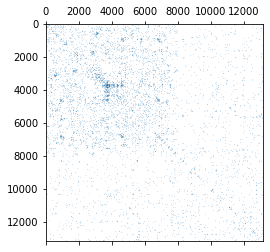

In [7]:
plt.spy(adj_relat_dc,markersize=0.05)